<a href="https://colab.research.google.com/github/ThinhNguyenV/Jupyter_Notebook/blob/main/19522286_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Total_bedrooms

In [179]:
import pandas as pd

data1 = pd.read_csv('/content/drive/MyDrive/housing.csv')
data1.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


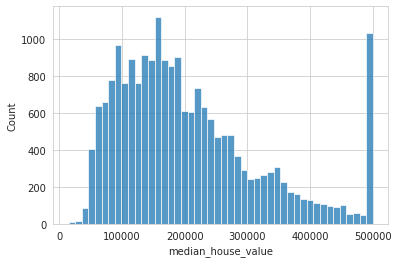

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data1['median_house_value'])

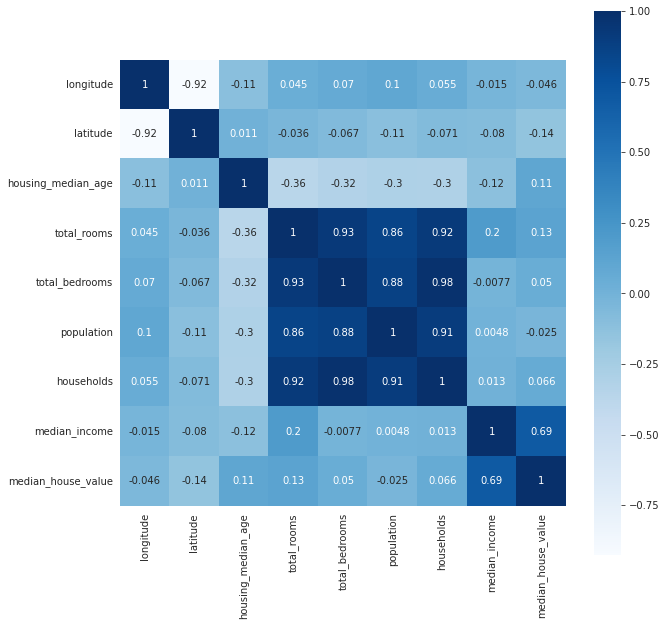

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
# tinh su phu thuoc cua tung thuoc tinh
correlation = data1.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

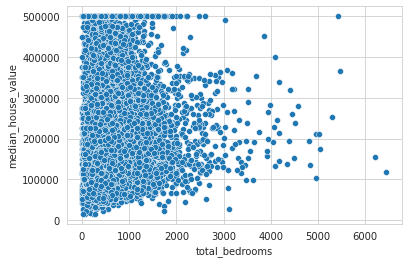

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data, x="total_bedrooms",y="median_house_value")

In [188]:
# Lay thuoc tinh total_bedrooms va median_house_value
X = data1['total_bedrooms']
y = data1['median_house_value']

In [241]:
# Phan chia du lieu
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed =sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed =sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

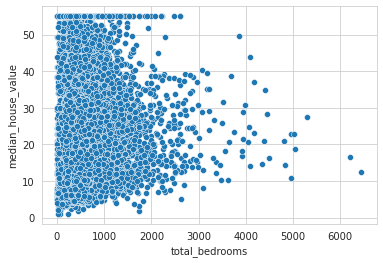

In [245]:
import seaborn as sns
import pandas as pd 
data_visualize = pd.DataFrame({"total_bedrooms": X_train, "median_house_value": y_train_transformed})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x="total_bedrooms", y="median_house_value") 

In [246]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train_transformed)

LinearRegression()

In [247]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='median')
X_processed = imp.fit_transform(X.values.reshape(-1,1))

In [248]:
X_processed.shape

(20640, 1)

In [249]:
y.shape

(20640,)

In [250]:
y_pred = model.predict(X_processed.reshape(-1,1))

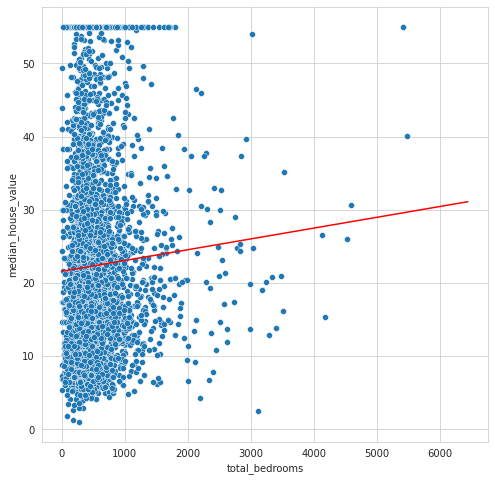

In [251]:
import seaborn as sns
test_true = pd.DataFrame({'total_bedrooms':X_test.values.reshape(-1), 'median_house_value':y_test_transformed})
test_pred = pd.DataFrame({'total_bedrooms':X_processed.reshape(-1), 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="total_bedrooms",y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="total_bedrooms",y="median_house_value")

In [219]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred, squared = True)

56095559711.52919

### Cross_validation

In [252]:
X = data1['total_bedrooms']
y = data1['median_house_value']

In [253]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [254]:
len(y_transformed)

20640

In [256]:
len(X_processed)

20640

In [257]:
y_train_pred = model.predict(X_processed.reshape(-1,1))

In [258]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
 X_train = X_processed[train_index].reshape(-1,1)
 y_train = y_transformed[train_index]
 X_test = X_processed[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse
 avg_mse.append(result)

In [259]:
import numpy as np
np.mean(np.array(avg_mse))

164.179327916978